<h1 align='center'> Model Building </h1>

The goal is to build a model that best predict the salary from below list:
- Linear Regression
- Lasso Regression
- Random Forest Regression

# Import Libraries and Data

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('glassdoor_jobs_cleaned.csv')
df

,job_title,job_description,rating,company_name,location,size,type_of_ownership,industry,sector,revenue,seniority,salary_min,salary_max,salary_avg,description_len,age
0,na,About the team\nZEXP is hiring an Applied Scie...,3.9,Zillow,Remote,5001 to 10000 Employees,Company - Public,Real Estate,Real Estate,$1 to $5 billion (USD),na,127,203,165.0,1727,17
1,data scientist,Position Purpose:\nThe Data Scientist is respo...,3.8,The Home Depot,GA,10000+ Employees,Company - Public,Home Furniture & Housewares Stores,Retail & Wholesale,$10+ billion (USD),na,127,203,165.0,1508,44
2,data scientist,"YOUR LIFE'S MISSION: POSSIBLE\nYou have goals,...",4.1,Navy Federal Credit Union,VA,10000+ Employees,Self-employed,Banking & Lending,Financial Services,Unknown / Non-Applicable,na,127,203,165.0,550,89
3,na,We would like to invite you to Sanofi’s mRNA V...,3.9,Sanofi,MA,10000+ Employees,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,$10+ billion (USD),na,127,203,165.0,873,49
4,data scientist,About care.ai\ncare.ai is the leading provider...,-1.0,care.ai,Remote,Unknown,-1,-1,-1,Unknown / Non-Applicable,na,127,203,165.0,580,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,data scientist,The Home Depot is able to offer virtual employ...,3.8,The Home Depot,GA,10000+ Employees,Company - Public,Home Furniture & Housewares Stores,Retail & Wholesale,$10+ billion (USD),senior,127,127,127.0,1787,44
996,data scientist,"JOB SUMMARY: Design, develop and evaluate adva...",4.0,Universal Orlando,FL,10000+ Employees,Subsidiary or Business Segment,Hotels & Resorts,Hotels & Travel Accommodation,$1 to $5 billion (USD),na,127,127,127.0,967,35
997,data scientist,Overview\n\nGuidehouse is a leading global pro...,3.7,Guidehouse,WA,1001 to 5000 Employees,Company - Private,Business Consulting,Management & Consulting,Unknown / Non-Applicable,senior,127,127,127.0,910,4
998,data scientist,"Location: 7000 Target Pkwy N, Brooklyn Park, M...",3.6,Target,MN,10000+ Employees,Company - Public,General Merchandise & Superstores,Retail & Wholesale,$10+ billion (USD),senior,127,127,127.0,1138,60


# Prepare Data for Model Building

## Choose Relevant Columns

In [5]:
df = df[['job_title', 'seniority', 'description_len', 'rating', 'location', 'size', 'type_of_ownership', 'industry', 'sector', 
         'revenue', 'age', 'salary_avg']]
df

,job_title,seniority,description_len,rating,location,size,type_of_ownership,industry,sector,revenue,age,salary_avg
0,na,na,1727,3.9,Remote,5001 to 10000 Employees,Company - Public,Real Estate,Real Estate,$1 to $5 billion (USD),17,165.0
1,data scientist,na,1508,3.8,GA,10000+ Employees,Company - Public,Home Furniture & Housewares Stores,Retail & Wholesale,$10+ billion (USD),44,165.0
2,data scientist,na,550,4.1,VA,10000+ Employees,Self-employed,Banking & Lending,Financial Services,Unknown / Non-Applicable,89,165.0
3,na,na,873,3.9,MA,10000+ Employees,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,$10+ billion (USD),49,165.0
4,data scientist,na,580,-1.0,Remote,Unknown,-1,-1,-1,Unknown / Non-Applicable,-1,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,data scientist,senior,1787,3.8,GA,10000+ Employees,Company - Public,Home Furniture & Housewares Stores,Retail & Wholesale,$10+ billion (USD),44,127.0
996,data scientist,na,967,4.0,FL,10000+ Employees,Subsidiary or Business Segment,Hotels & Resorts,Hotels & Travel Accommodation,$1 to $5 billion (USD),35,127.0
997,data scientist,senior,910,3.7,WA,1001 to 5000 Employees,Company - Private,Business Consulting,Management & Consulting,Unknown / Non-Applicable,4,127.0
998,data scientist,senior,1138,3.6,MN,10000+ Employees,Company - Public,General Merchandise & Superstores,Retail & Wholesale,$10+ billion (USD),60,127.0


## Encode Categorical Columns Using `pd.get_dummies`

In [7]:
df_dummy = pd.get_dummies(df)
df_dummy

,description_len,rating,age,salary_avg,job_title_data analyst,job_title_data engineer,job_title_data scientist,job_title_machine learning engineer,job_title_manager,job_title_na,...,revenue_$1 to $5 billion (USD),revenue_$1 to $5 million (USD),revenue_$10+ billion (USD),revenue_$100 to $500 million (USD),revenue_$25 to $100 million (USD),revenue_$5 to $10 billion (USD),revenue_$5 to $25 million (USD),revenue_$500 million to $1 billion (USD),revenue_Less than $1 million (USD),revenue_Unknown / Non-Applicable
0,1727,3.9,17,165.0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,1508,3.8,44,165.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,550,4.1,89,165.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,873,3.9,49,165.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,580,-1.0,-1,165.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1787,3.8,44,127.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
996,967,4.0,35,127.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
997,910,3.7,4,127.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
998,1138,3.6,60,127.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Train Test Split

In [18]:
X = df_dummy.drop(['salary_avg'], axis=1)
y = df_dummy['salary_avg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Building

## Linear Regression

In [64]:
linear_reg = LinearRegression().fit(X_train, y_train)
error = np.mean(cross_val_score(linear_reg, X_train, y_train, scoring='neg_mean_absolute_error'))
r_square = linear_reg.score(X_train, y_train)

print(f'Negative Mean Absolute Error: {error}')
print(f'R-Square: {r_square}')

Negative Mean Absolute Error: -14.398248437917136
R-Square: 0.24399194869931762


## Lasso Regression

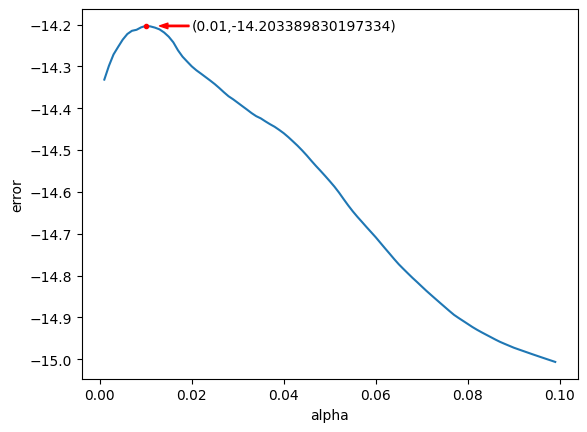

Negative Mean Absolute Error: -14.203389830197334
R-Square: 0.22846780036975023


In [189]:
# tune the alpha parameters
alpha = []
error = []

for i in range(1, 100):
    lasso_reg = Lasso(alpha=i/1000)
    alpha.append(i/1000)
    err = np.mean(cross_val_score(lasso_reg, X_train, y_train, scoring='neg_mean_absolute_error'))
    error.append(err)

# find the minimun error and the corresponding alpha
index = np.argmin(np.abs(error))
tuned_alpha = alpha[index]
min_error = error[index]

# plot alpha-error
plt.plot(alpha, error)
plt.xlabel('alpha')
plt.ylabel('error')
plt.plot(tuned_alpha, min_error, marker='o', markersize=3, color='red')
plt.annotate(f'({tuned_alpha},{min_error})', xy=(tuned_alpha+0.003, min_error),
            xytext=(tuned_alpha+0.01, min_error),
            arrowprops=dict(facecolor='red', edgecolor='red', headwidth=4, width=1, headlength=6),
            horizontalalignment='left', verticalalignment='center')
plt.show()

# use the tuned alpha to build model
lasso_reg_tuned = Lasso(alpha=0.01).fit(X_train, y_train)
r_square = lasso_reg_tuned.score(X_train, y_train)
print(f'Negative Mean Absolute Error: {min_error}')
print(f'R-Square: {r_square}')

## Random Forest Regression

In [191]:
forest_reg = RandomForestRegressor()
np.mean(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error'))

-13.418200840620244

In [195]:
# tune the model
parameters = {'n_estimators': range(10,200,10), 'max_features': [2,4,6,8]}
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, parameters, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_features': 4, 'n_estimators': 190}

In [197]:
grid_search.best_score_

-13.435041077550128

In [193]:
RandomForestRegressor?

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versioncha